# Second Machine learning model to integrate with Mobile application.

Using a second dataset, the correlation between first model(EEG and workload level) and this model is calculated. Mobile application uses this correlation to rectify the workload level to get an accurate value using that correction factor.

# Data Loading and Preprocessing

In [33]:
!pip install seaborn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
excel_file = "workload_data.xlsx"
data = pd.read_excel(excel_file)

# Extract features (x) and target variable (y)
x = data[["time taken", "accuracy scored"]]
y = data["WL"]

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Model Building

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for 'poly' kernel
    'gamma': ['scale', 'auto']  # Only for 'rbf', 'poly', and 'sigmoid' kernels
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the SVM model with the best parameters
best_model = SVC(**best_params)
best_model.fit(x_train, y_train)

Best parameters found:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1, degree=2)

# accuracies

In [35]:
# Make predictions on the test data
y_pred = best_model.predict(x_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a table to display the results
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics)

print("Best Model Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(1, 6)]))

print("\nMetrics Table:")
print(metrics_df)

Best Model Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.80      0.62         5
           2       1.00      0.43      0.60         7
           3       0.50      0.67      0.57         3
           4       0.50      0.29      0.36         7
           5       0.56      0.83      0.67         6

    accuracy                           0.57        28
   macro avg       0.61      0.60      0.56        28
weighted avg       0.64      0.57      0.55        28


Metrics Table:
      Metric     Score
0   Accuracy  0.571429
1  Precision  0.636905
2     Recall  0.571429
3   F1 Score  0.554881


# Confusion matrix

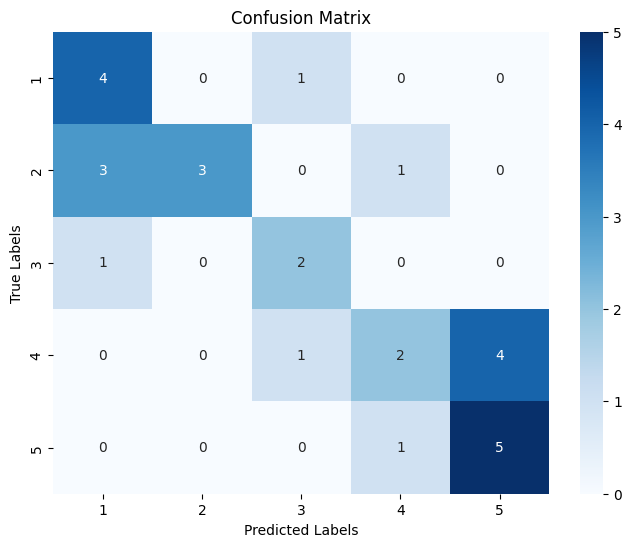

In [36]:
# Plot the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 6), yticklabels=range(1, 6))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predicting workload

In [37]:
# Function to predict workload level based on task performance accuracy and time taken
def predict_workload_from_input():

    accuracy = float(input("Enter task performance accuracy (%): "))
    time_taken = float(input("Enter time taken (seconds): "))

    # Scale the input data
    input_data_scaled = scaler.transform([[accuracy, time_taken]])

    # Predict workload level
    predicted_level = best_model.predict(input_data_scaled)[0]

    return predicted_level


predicted_level = predict_workload_from_input()
print(f"Predicted workload level: {predicted_level}")


Enter task performance accuracy (%): 100
Enter time taken (seconds): 22
Predicted workload level: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
